In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [20]:
np.random.seed(1)  #난수 생성의 시드를 설정
X = np.random.rand(40,1)**2  #  [0, 1) 사이의 범위에서 균일한 분포를 갖는 난수를 주어진 형태로 반환
y = (10-1./(X.ravel()+0.1)) + np.random.randn(40)  # 표준 정규 분포에서 샘플링한 난수를 반환

In [21]:
import matplotlib.pyplot as plt

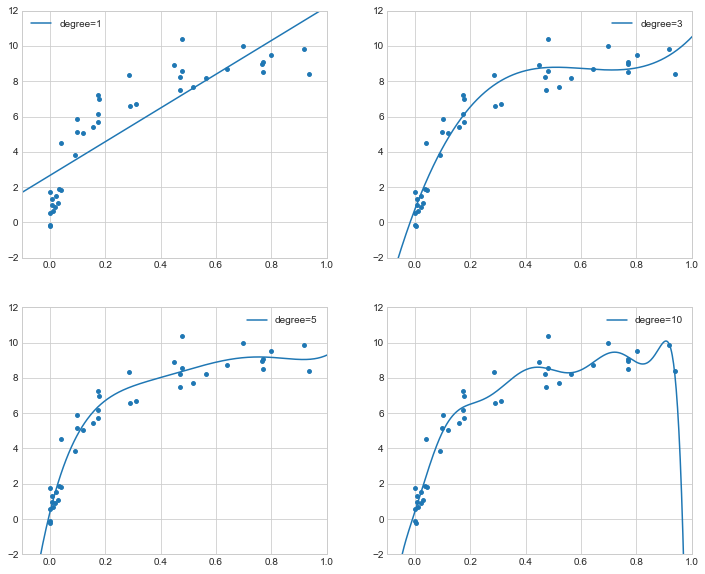

In [22]:
plt.style.use('seaborn-whitegrid')
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1 ,1)
fig = plt.figure(figsize=(12, 10))
for i, degree in enumerate([1,3,5,10], start=1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(), y, s=15)
    
    # make_pipeline(*steps, memory=None, verbose=False) 
      # steps: list of Estimator objects // List of the scikit-learn estimators that are chained together.
      # memory: str or object with the joblib.Memory interface, default=None // Used to cache the fitted transformers of the pipeline
      # verbose: bool, default=False // If True, the time elapsed while fitting each step will be printed as it is completed.
        
    # PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C') : # 현재 데이터를 다항식 형태로 변경.
      # degree : int or tuple. 
      # interaction_only : bool // If True, only interaction features are produced
      # include_bias : bool //  If True (default), then include a bias column, the feature in which all polynomial powers are zero
      # order : {‘C’, ‘F’} //  Order of output array in the dense case.
    
    
    # make_pipeline을 통해 PolynomialFeatures와 LinearRegression의 과정이 한번으로 통합된 모델을 생성
    y_test = make_pipeline(PolynomialFeatures(degree),  # degree로 차수 조절
                           LinearRegression()).fit(X,y).predict(X_test)  # 생성된 선형회귀 모델에 x와 y를 fit
    ax.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best')